<a href="https://colab.research.google.com/github/adityakalra581/Data-Science/blob/master/Diuresis_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Reading a Different Sheet in Pandas

In [0]:


# xls = pd.ExcelFile('path_to_file.xls')
# df1 = pd.read_excel(xls, 'Sheet1')
# df2 = pd.read_excel(xls, 'Sheet2')



xls = pd.ExcelFile("Train_dataset.xlsx")
data = pd.read_excel(xls,'Diuresis_TS')


In [46]:
data.head()

,people_ID,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00
0,1,441,544.2,669.64,821.368,1002.2416,1215.68992,1472.627904
1,2,151,197.2,253.24,321.688,399.9256,492.91072,606.892864
2,3,416,515.2,632.44,776.728,947.7736,1150.32832,1395.793984
3,4,410,506.0,621.40,761.880,928.1560,1126.78720,1368.344640
4,5,390,483.0,595.00,730.200,892.8400,1084.40800,1315.889600


In [47]:
data.shape

(10714, 8)

In [48]:
data.dtypes

people_ID                int64
2020-03-20 00:00:00      int64
2020-03-21 00:00:00    float64
2020-03-22 00:00:00    float64
2020-03-23 00:00:00    float64
2020-03-24 00:00:00    float64
2020-03-25 00:00:00    float64
2020-03-26 00:00:00    float64
dtype: object

In [49]:
data.columns

Index([        'people_ID', 2020-03-20 00:00:00, 2020-03-21 00:00:00,
       2020-03-22 00:00:00, 2020-03-23 00:00:00, 2020-03-24 00:00:00,
       2020-03-25 00:00:00, 2020-03-26 00:00:00],
      dtype='object')

In [50]:
data.columns=['people_ID','20','21','22','23','24','25','26']
data.head()

,people_ID,20,21,22,23,24,25,26
0,1,441,544.2,669.64,821.368,1002.2416,1215.68992,1472.627904
1,2,151,197.2,253.24,321.688,399.9256,492.91072,606.892864
2,3,416,515.2,632.44,776.728,947.7736,1150.32832,1395.793984
3,4,410,506.0,621.40,761.880,928.1560,1126.78720,1368.344640
4,5,390,483.0,595.00,730.200,892.8400,1084.40800,1315.889600


In [51]:
data.dtypes

people_ID      int64
20             int64
21           float64
22           float64
23           float64
24           float64
25           float64
26           float64
dtype: object

## Melting the Data

- To make analysis of data in table easier, we can reshape the data into a more computer-friendly form using Pandas in Python. Pandas.melt() is one of the function to do so..
Pandas.melt() unpivots a DataFrame from wide format to long format.

- Read more here:  

- [pandas.melt](https://www.geeksforgeeks.org/python-pandas-melt/)

In [52]:
melt = data.melt(id_vars='people_ID', var_name='Date', value_name='Diuresis')

melt.head()

,people_ID,Date,Diuresis
0,1,20,441.0
1,2,20,151.0
2,3,20,416.0
3,4,20,410.0
4,5,20,390.0


In [53]:
melt.shape

(74998, 3)

In [55]:
melt.head()

,people_ID,Date,Diuresis
0,1,20,441.0
1,2,20,151.0
2,3,20,416.0
3,4,20,410.0
4,5,20,390.0


## Sorting a Dataframe w.r.t a Column

- [pd.sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [62]:
data = melt.sort_values(by=['people_ID','Date'])
data.head(20)

,people_ID,Date,Diuresis
0,1,20,441.000000
10714,1,21,544.200000
21428,1,22,669.640000
32142,1,23,821.368000
42856,1,24,1002.241600
53570,1,25,1215.689920
64284,1,26,1472.627904
1,2,20,151.000000
10715,2,21,197.200000
21429,2,22,253.240000


In [63]:
data.isnull().sum()

people_ID    0
Date         0
Diuresis     0
dtype: int64

- Thank god there are no missing Values.

Text(0.5, 1.0, 'INCREASING DIURESIS WITH INCREASE IN DAYS')

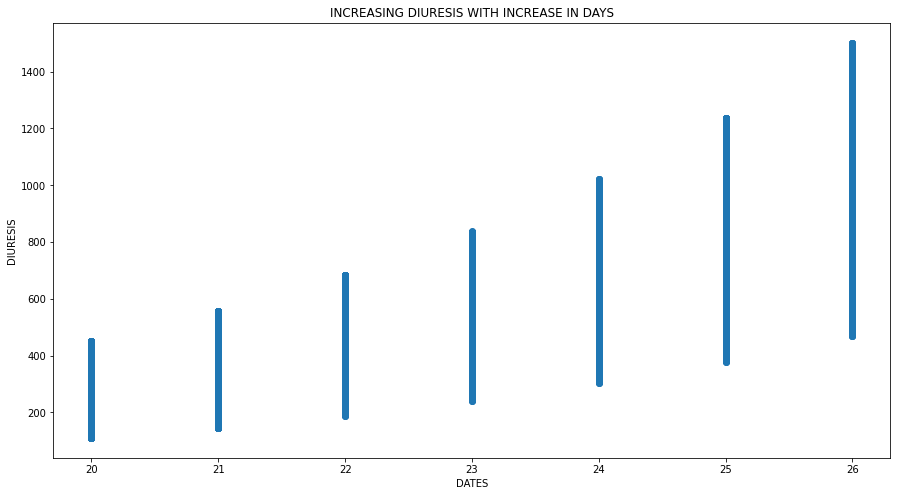

In [68]:
plt.figure(figsize=(15,8))
plt.scatter(x='Date',y='Diuresis',data=data)
plt.xlabel("DATES")
plt.ylabel("DIURESIS")
plt.title("INCREASING DIURESIS WITH INCREASE IN DAYS")

- Clearly we can see the Trend.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa899b41cf8>,
      dtype=object)

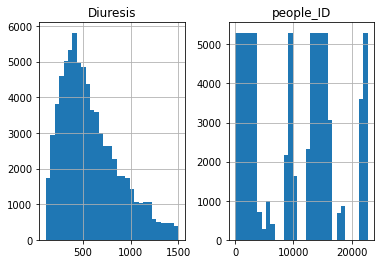

In [70]:
data.hist(bins=30)